<a href="https://colab.research.google.com/github/Aguiar28D/Aguiar28D.github.io/blob/main/Student_Performance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Practice Project: Student Performance

This is a project by Diego Aguiar


# Student Performance
The idea of this project is to practice data science skills. The idea is to folow these steps:
1.   Find an interesting dataset and ask a relevant question.
2.   Clean the data set.
3.   Do some exploratory data analysis.
4.   Use econometric tools.
5.   Practice predictive machine learning

##1.   Find an interesting dataset and ask a relevant question.

Load the Data Set
The data set is from kaggle, here is the [exact webpage](https://www.kaggle.com/datasets/rabieelkharoua/students-performance-dataset).

This dataset contains comprehensive information on 2,392 high school students, detailing their demographics, study habits, parental involvement, extracurricular activities, and academic performance. The target variable, GradeClass, classifies students' grades into distinct categories, providing a robust dataset for educational research, predictive modeling, and statistical analysis.

A warning that should be considered is that this dataset is sinthetic.

### Main Goal

With this dataset the question that I want to address is what variables are the most relevant at explaining the academic performance of a student (measured as the GPA).

After doing so I will try to predict the GPA, using the other variables.

Data Project

In [1]:
#1. Installing kaggle
!pip install -q kaggle

#2. Upload the Json file kaggle.json
from google.colab import files
files.upload()

#3. Environment Cofiguration
import os
os.makedirs("/root/.kaggle", exist_ok=True)
os.rename("kaggle.json", "/root/.kaggle/kaggle.json")
os.chmod("/root/.kaggle/kaggle.json", 600)

#4. Download complete dataset
!kaggle datasets download -d rabieelkharoua/students-performance-dataset

#5. Unzip
import zipfile

with zipfile.ZipFile("students-performance-dataset.zip", "r") as zip_ref:
    zip_ref.extractall("students_data")

# 🔍 6. Check
import os
print("Downloaded files:", os.listdir("students_data"))



Saving kaggle.json to kaggle.json
Dataset URL: https://www.kaggle.com/datasets/rabieelkharoua/students-performance-dataset
License(s): Attribution 4.0 International (CC BY 4.0)
Downloaded files: ['Student_performance_data _.csv']


In [2]:
import os

print("¿Existe en raíz?", os.path.exists("kaggle.json"))
print("¿Existe en /root/.kaggle/ ?", os.path.exists("/root/.kaggle/kaggle.json"))


¿Existe en raíz? False
¿Existe en /root/.kaggle/ ? True


In [3]:
# 📥 Descargar el ZIP completo del dataset
!kaggle datasets download -d rabieelkharoua/students-performance-dataset

# 🗂️ Descomprimir el contenido
import zipfile
with zipfile.ZipFile("students-performance-dataset.zip", "r") as zip_ref:
    zip_ref.extractall("students_data")

# 🔍 Verificar qué archivo hay dentro
import os
print("Archivos descargados:", os.listdir("students_data"))


Dataset URL: https://www.kaggle.com/datasets/rabieelkharoua/students-performance-dataset
License(s): Attribution 4.0 International (CC BY 4.0)
students-performance-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)
Archivos descargados: ['Student_performance_data _.csv']


In [4]:
import pandas as pd

# Asegurate de usar el nombre correcto (¡con guión bajo!)
df = pd.read_csv("students_data/Student_performance_data _.csv")
df.head()


,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,1001,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196,2.0
1,1002,18,0,0,1,15.408756,0,0,1,0,0,0,0,3.042915,1.0
2,1003,15,0,2,3,4.210570,26,0,2,0,0,0,0,0.112602,4.0
3,1004,17,1,0,3,10.028829,14,0,3,1,0,0,0,2.054218,3.0
4,1005,17,1,0,2,4.672495,17,1,3,0,0,0,0,1.288061,4.0


## 2.   Clean the data set.

In [5]:
df.describe()

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
count,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000
mean,2196.500000,16.468645,0.510870,0.877508,1.746237,9.771992,14.541388,0.301421,2.122074,0.383361,0.303512,0.196906,0.157191,1.906186,2.983696
std,690.655244,1.123798,0.499986,1.028476,1.000411,5.652774,8.467417,0.458971,1.122813,0.486307,0.459870,0.397744,0.364057,0.915156,1.233908
min,1001.000000,15.000000,0.000000,0.000000,0.000000,0.001057,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1598.750000,15.000000,0.000000,0.000000,1.000000,5.043079,7.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.174803,2.000000
50%,2196.500000,16.000000,1.000000,0.000000,2.000000,9.705363,15.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,1.893393,4.000000
75%,2794.250000,17.000000,1.000000,2.000000,2.000000,14.408410,22.000000,1.000000,3.000000,1.000000,1.000000,0.000000,0.000000,2.622216,4.000000
max,3392.000000,18.000000,1.000000,3.000000,4.000000,19.978094,29.000000,1.000000,4.000000,1.000000,1.000000,1.000000,1.000000,4.000000,4.000000


*   The dataframe has 2392 observations, which is not a big amount in oder to do predictions.
*   On the other hand, it has many relevant variables.

In [6]:
df.isnull().values.any()

np.False_

There are no missing vaues.




In [7]:
# Check for duplicate rows
df.duplicated().sum()

# Drop duplicates if needed
#df = df.drop_duplicates()

np.int64(0)

There are no duplicated values.

In [10]:
df.dtypes

,0
StudentID,int64
Age,int64
Gender,int64
Ethnicity,int64
ParentalEducation,int64
StudyTimeWeekly,float64
Absences,int64
Tutoring,int64
ParentalSupport,int64
Extracurricular,int64


The types are correct, it looks like this dataset is already cleaned and ready to be used.

## 3.   Do some exploratory data analysis.

Given that the objective variable is GPA, I will try to see how it behaves on its own and in comparisson to all the other variables.

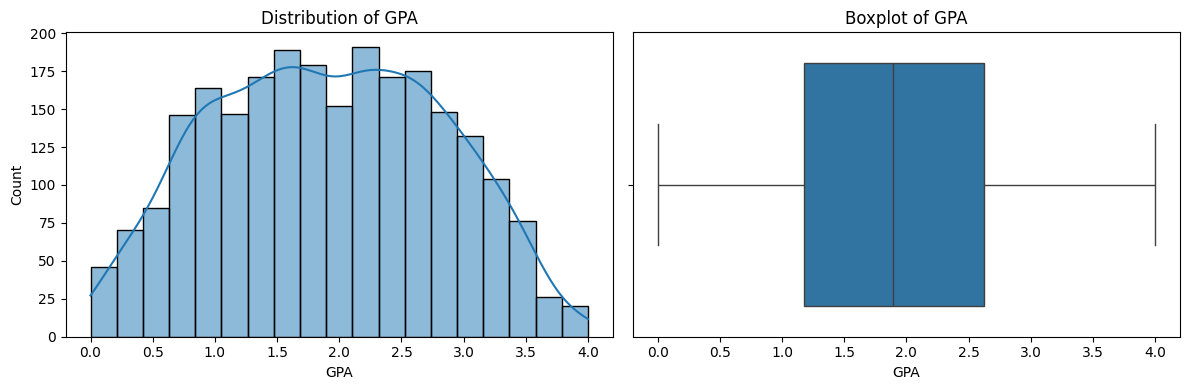

In [66]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set up side-by-side plots
fig, axs = plt.subplots(1, 2, figsize=(12, 4))  # 1 row, 2 columns

# Histogram + KDE
sns.histplot(df['GPA'], kde=True, ax=axs[0])
axs[0].set_title("Distribution of GPA")
axs[0].set_xlabel("GPA")
axs[0].set_ylabel("Count")

# Boxplot
sns.boxplot(x=df['GPA'], ax=axs[1])
axs[1].set_title("Boxplot of GPA")
axs[1].set_xlabel("GPA")

plt.tight_layout()
plt.show()


We can see that it has a distribution that resembles a bell (like a Normal Distribution), which is expected. The median is slightly below 2 which is unexpected, I thaught it would be higher.

Now let's see how the distribution of the explanatory variabes.

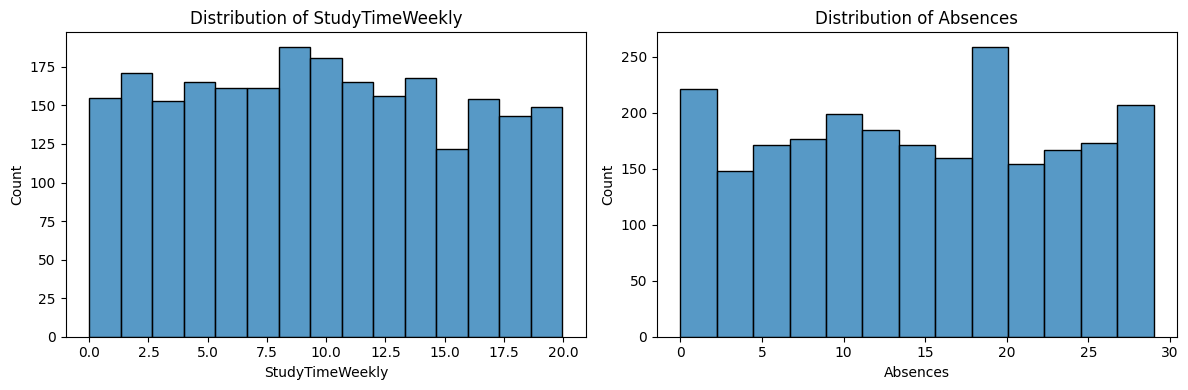

In [67]:
import matplotlib.pyplot as plt
import seaborn as sns

num_cols = ['StudyTimeWeekly', 'Absences']

# One row, 3 columns
fig, axes = plt.subplots(1, len(num_cols), figsize=(12, 4))

for i, col in enumerate(num_cols):
    sns.histplot(df[col], ax=axes[i])
    axes[i].set_title(f"Distribution of {col}")

plt.tight_layout()
plt.show()


They boh have a uniform distribution. It is interesting to see that there is a pick below 20 absences, maybe this is a relevant number, like the amount of absences someone can have without some negative repercusion.

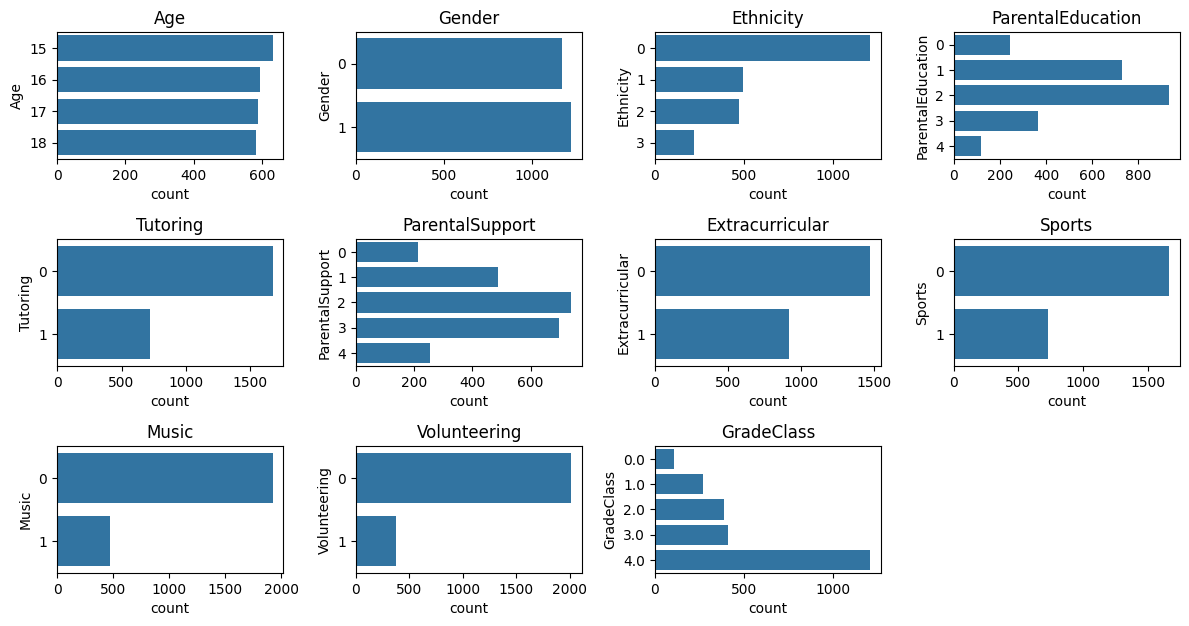

In [59]:
cat_cols = ['Age', 'Gender', 'Ethnicity', 'ParentalEducation', 'Tutoring', 'ParentalSupport',
            'Extracurricular', 'Sports', 'Music', 'Volunteering', 'GradeClass']

# Define rows and columns for the grid (e.g., 3x4)
n_rows = 4
n_cols = 4
fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, 8))

for i, col in enumerate(cat_cols):
    r = i // n_cols
    c = i % n_cols
    sns.countplot(y=df[col], ax=axes[r][c])
    axes[r][c].set_title(f"{col}")

# Hide any empty subplot (if total < n_rows*n_cols)
for j in range(len(cat_cols), n_rows * n_cols):
    fig.delaxes(axes[j // n_cols][j % n_cols])

plt.tight_layout()
plt.show()



Some comments about these variables:
1.   Age has a uniform distribution.
2.   There is no relevant difference in the quantity of each gender. Should be noted that 0 is males and 1 females.
3.   There is a considerable difference in the amount of students in each ethnicity. 0 is Caucasian, 1 is African American, 2 is Asian, 3 is Other.
4.   Parental education has a bell shape: 0 is None, 1 is High School, 2 is Some College, 3 is Bachelor's, 4 is Higher.
5.   Tutoring is binomial with most students not receiving tutoring.
6.   Parental supporthas a bell shape. 0 is None, 1 is Low, 2 is Moderate, 3 is High, 4 is Very High.
7.   Extracurricular, Sports, Music and Volunteeing are all binomial distribution with most students reporting not doing these activities.
8. Grade class is just atransformation of GPA, so it is not an explanatory variable, most students receive A's.



Now let's see how the objective variable behaves with respect to the explanatory ones. For the numerical variables I will plot them against each other, for the categorical I will create box plots for each.

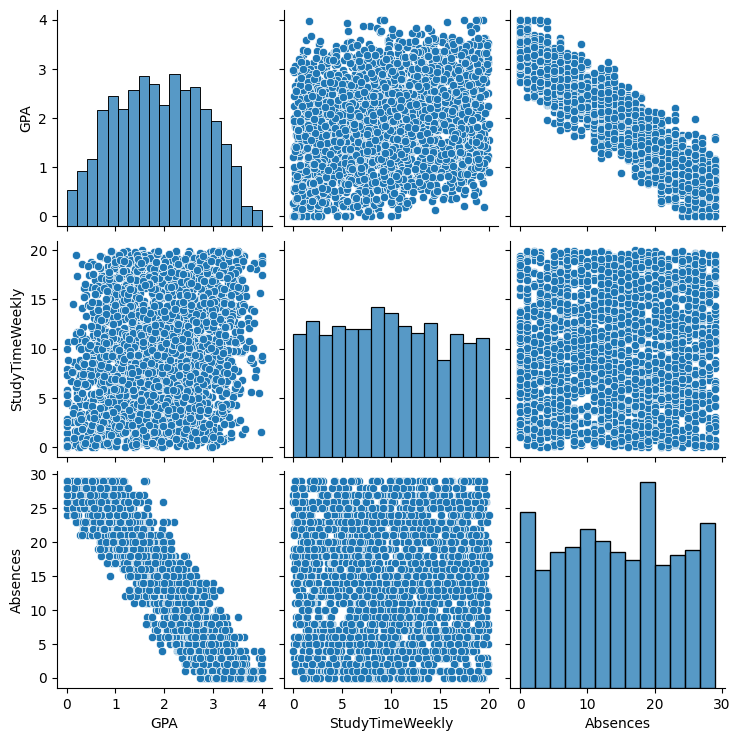

In [17]:
df[['GPA', 'StudyTimeWeekly', 'Absences']].corr()
sns.pairplot(df[['GPA', 'StudyTimeWeekly', 'Absences']])


The only clear patter is that, as expected there is a negative correlation between GPA and absences.

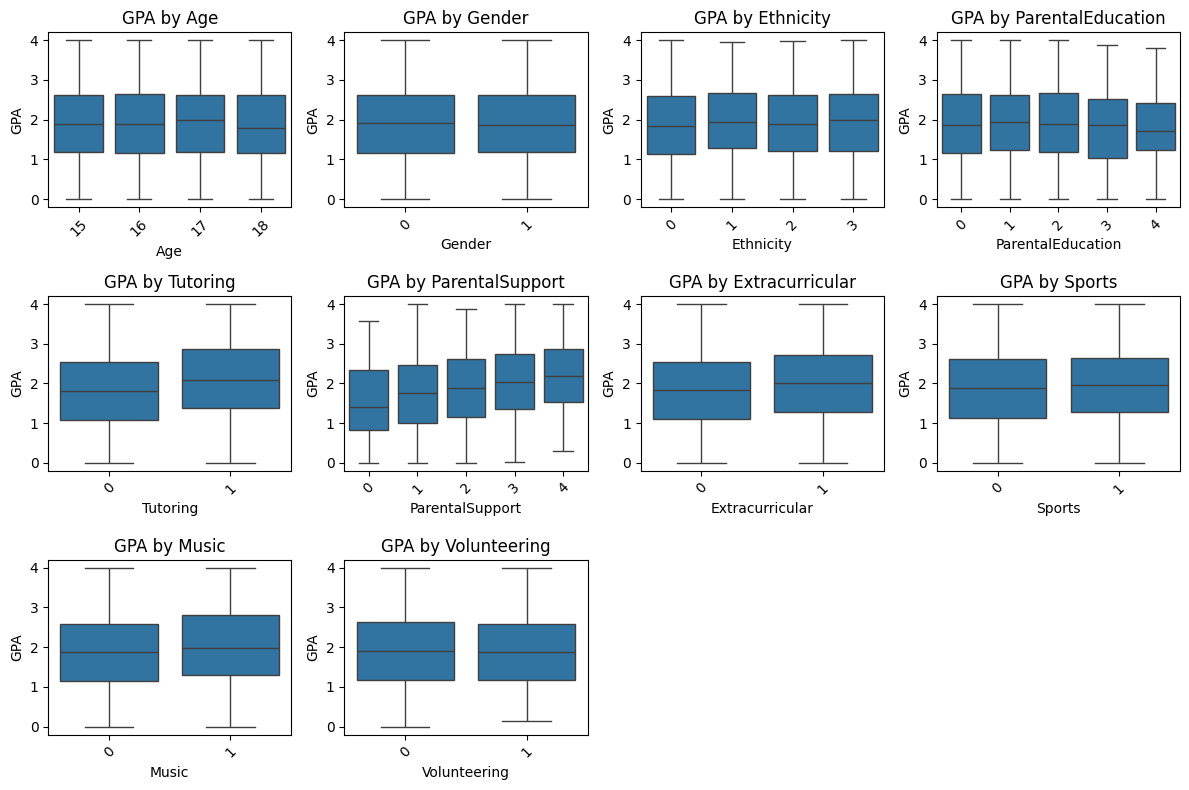

In [64]:
cols = ['Age','Gender', 'Ethnicity', 'ParentalEducation', 'Tutoring', 'ParentalSupport',
        'Extracurricular', 'Sports', 'Music', 'Volunteering']

# Grid layout (e.g. 3 rows x 4 columns)
n_rows = 3
n_cols = 4
fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, 8))

for i, col in enumerate(cols):
    r = i // n_cols
    c = i % n_cols
    ax = axes[r][c]

    sns.boxplot(x=col, y='GPA', data=df, ax=ax)
    ax.set_title(f'GPA by {col}')
    ax.tick_params(axis='x', rotation=45)

# Hide any extra empty subplots
for j in range(len(cols), n_rows * n_cols):
    fig.delaxes(axes[j // n_cols][j % n_cols])

plt.tight_layout()
plt.show()


I will only make comments on the ones that show an interesting behavior.
1.   Parental education is opposite to what I expected. Students that have parents with higher education have a lower GPA.
2.   As expected, tutoring has a positive impact on GPA.
3.   Parental support has a big impact on GPA results.
As a side note, there are no outliers in any of the variables.


Given the unexpected result I got with 'Parental Education' I will re do the analysis mixing this variable with 'Parental Support'.

<Axes: xlabel='ParentalEducation', ylabel='GPA'>

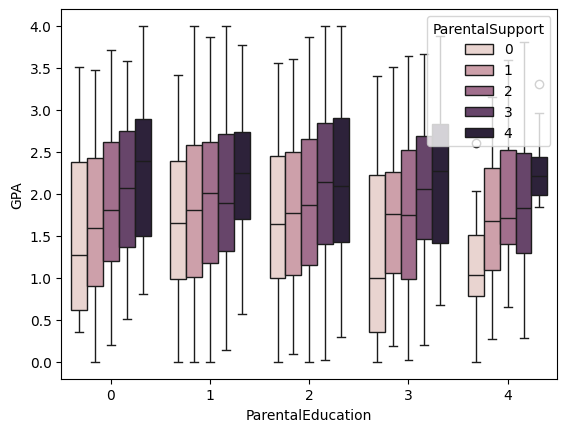

In [28]:
sns.boxplot(x='ParentalEducation', y='GPA', hue='ParentalSupport', data=df)


As before, parental support has a positive impact for all the levels. Another unexpected result is that parental support of parents with no education, seems to be more effective than that of parents with higher education.  

## 4.   Use econometric tools.


Let's run a multilinear model, to see the predictive power od the explanatory variables.

In [31]:
df_model = df.copy()

# Drop irrelevant columns
df_model = df_model.drop(columns=['StudentID','GradeClass'])

import statsmodels.api as sm

# Define dependent variable
y = df_model['GPA']

# Define independent variables (all except GPA)
X = df_model.drop(columns=['GPA'])

# Add constant (intercept)
X = sm.add_constant(X)

model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    GPA   R-squared:                       0.954
Model:                            OLS   Adj. R-squared:                  0.954
Method:                 Least Squares   F-statistic:                     4118.
Date:                Fri, 18 Apr 2025   Prob (F-statistic):               0.00
Time:                        13:50:27   Log-Likelihood:                 502.85
No. Observations:                2392   AIC:                            -979.7
Df Residuals:                    2379   BIC:                            -904.6
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 2.5974      0.06

Before interpreting this model, let's see if the assumptions hold.
The five assumptions are:
1.   Linearity in the relationship. The relationship is linear.
2.   Independence of the errors, no autocorrelation. Residuals should not be correlated with each other.
3.   Homoskedasticity. The variance of the residuals should be the same for the explanatory variables.
4.   No perfect multicolinearity. The explanatory variables should be linealy independent.
5.   Normality of residuals. (needed for hypotesis testing).

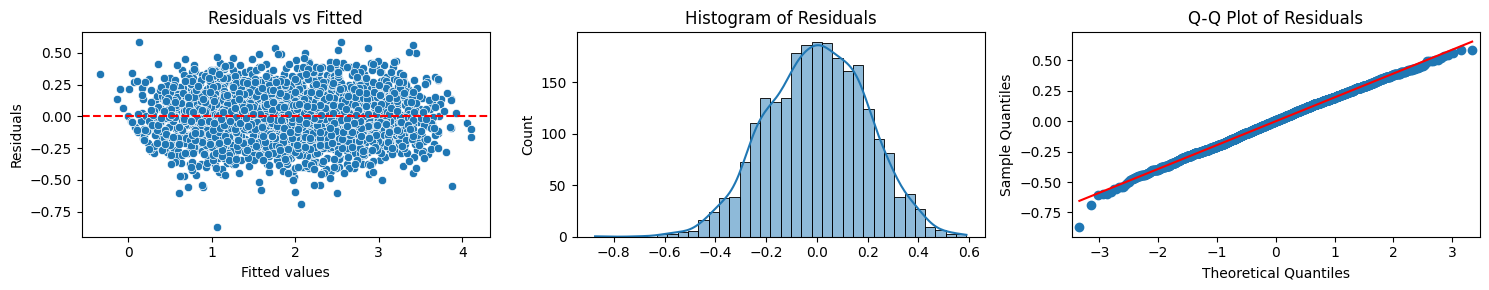


 Durbin-Watson stat: 1.9842

 Normality test (Anderson-Darling): p-value = 0.0196
Residuals are NOT normally distributed.

 Homoskedasticity test (Breusch-Pagan):
LM stat: 9.4374
LM p-value: 0.6652
F-stat: 0.7853
F p-value: 0.6663
No strong evidence of heteroskedasticity.

 Variance Inflation Factors (VIF):
              Feature         VIF
0               const  232.096195
1                 Age    1.008050
2              Gender    1.004085
3           Ethnicity    1.004501
4   ParentalEducation    1.005870
5     StudyTimeWeekly    1.003410
6            Absences    1.005220
7            Tutoring    1.005462
8     ParentalSupport    1.004679
9     Extracurricular    1.001835
10             Sports    1.004609
11              Music    1.004414
12       Volunteering    1.003994
Potential multicollinearity detected in:
  Feature         VIF
0   const  232.096195


In [47]:
from statsmodels.stats.stattools import durbin_watson
from statsmodels.stats.diagnostic import normal_ad, het_breuschpagan
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Residuals and fitted values
residuals = model.resid
fitted = model.fittedvalues

# -----------------------------------
# RESIDUAL DIAGNOSTIC PLOTS
# -----------------------------------
fig, axs = plt.subplots(1, 3, figsize=(15, 3))

# 1. Residuals vs Fitted
sns.scatterplot(x=fitted, y=residuals, ax=axs[0])
axs[0].axhline(0, color='red', linestyle='--')
axs[0].set_title("Residuals vs Fitted")
axs[0].set_xlabel("Fitted values")
axs[0].set_ylabel("Residuals")

# 2. Histogram of Residuals
sns.histplot(residuals, kde=True, ax=axs[1])
axs[1].set_title("Histogram of Residuals")

# 3. Q-Q Plot
sm.qqplot(residuals, line='s', ax=axs[2])
axs[2].set_title("Q-Q Plot of Residuals")

plt.tight_layout()
plt.show()

# -----------------------------------
# NO AUTOCORRELATION (Durbin-Watson)
# -----------------------------------
dw = durbin_watson(residuals)
print(f"\n Durbin-Watson stat: {dw:.4f}")


# -----------------------------------
# NORMALITY TEST (Anderson-Darling)
# -----------------------------------
stat, p = normal_ad(residuals)
print(f"\n Normality test (Anderson-Darling): p-value = {p:.4f}")
if p < 0.05:
    print("Residuals are NOT normally distributed.")
else:
    print("Residuals appear normally distributed.")

# -----------------------------------
# HOMOSKEDASTICITY TEST (Breusch-Pagan)
# -----------------------------------
bp_test = het_breuschpagan(residuals, model.model.exog)
labels = ['LM stat', 'LM p-value', 'F-stat', 'F p-value']
print("\n Homoskedasticity test (Breusch-Pagan):")
for name, value in zip(labels, bp_test):
    print(f"{name}: {value:.4f}")
if bp_test[1] < 0.05:
    print("Heteroskedasticity detected.")
else:
    print("No strong evidence of heteroskedasticity.")

# -----------------------------------
# MULTICOLLINEARITY (VIF)
# -----------------------------------
vif_data = pd.DataFrame()
vif_data['Feature'] = model.model.exog_names
vif_data['VIF'] = [variance_inflation_factor(model.model.exog, i) for i in range(model.model.exog.shape[1])]

print("\n Variance Inflation Factors (VIF):")
print(vif_data)

high_vif = vif_data[vif_data['VIF'] > 5]
if not high_vif.empty:
    print("Potential multicollinearity detected in:")
    print(high_vif)
else:
    print("No serious multicollinearity detected (VIF < 5).")


1.   Linearity in the relationship. The residuals are randomly scattered, so this assumption holds.
2.   Independence of the errors, no autocorrelation. The Durbin Watson value is close to 2, so there is no autocorrelation.
3.   Homoskedasticity. LM p-value: 0.6652 so there is no evidence of heteroskedasticity.
4.   No perfect multicolinearity. VIF < 5 so there is no perfect or problematic multicolineairty.
5.   Normality of residuals. Normality test (Anderson-Darling): p-value = 0.0196. Residuals are NOT normally distributed. However the histogram of residuals has a bell shape and the QQ plot looks like it should. In case this might be a problem, let's use robust standard errors.


In [48]:
robust_model = model.get_robustcov_results()
print(robust_model.summary())


                            OLS Regression Results                            
Dep. Variable:                    GPA   R-squared:                       0.954
Model:                            OLS   Adj. R-squared:                  0.954
Method:                 Least Squares   F-statistic:                     4341.
Date:                Fri, 18 Apr 2025   Prob (F-statistic):               0.00
Time:                        14:25:26   Log-Likelihood:                 502.85
No. Observations:                2392   AIC:                            -979.7
Df Residuals:                    2379   BIC:                            -904.6
Df Model:                          12                                         
Covariance Type:                  HC1                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 2.5974      0.06

Now let's analyze these results.
*   R2 is extremely high 0.95 so it is a good linear model, we can explain the objective variable with the explanatory ones in a linear way.
*   Looking at the level of significance of 5% (the standard) we can conclude that Ethnicity and ParentalEducation are not significant. This is a good result because ParentalEducation was the one we noted was not intuitive.
*   The variables that have a negative effect on GPA are age (although it is very small), Absences (which we had already seen before) and Volunteering (it should be noted that the significance of this variable is not that high).
*   The variables that have a positive and significant effect on GPA are gender, StudyTimeWeekly (as expected), Tutoring (as shown before), ParentalSupport (which we had already seen), Extracurricular, Sports, Music.

Main conclusion:

Overall, the model explains GPA extremely well, with key positive effects from behavioral and support-related factors (Study Time, Tutoring, Parental Support), while absenteeism significantly reduces GPA. The lack of significance for background factors like Ethnicity or Parental Education suggests that present-time inputs and support may matter more than background in explaining academic performance — a finding that has relevant policy implications.



# 5.   Practice predictive machine learning

In this part I will shift the focus. Instead of trying to understand the individual effect of the variables I will try to predict the GPA given the other ones. In order to do this I will use two different tools, a linear regression (as before) and a Decsision Tree.

In order to measure the predictive power I will split the data into train and test sets. The idea is to train the model by using the train set. So I will estimate the betas of the regression and the decision variables and cuts of the branches in the tree by using this sub sample of the data set. Then I will use the test data set in order to see how well do the models perform, how good they are at predicting the objective variable.

In [65]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import StandardScaler

# Use the same preprocessed df_model as before (with dummies and no NA)
X = df_model.drop('GPA', axis=1)
y = df_model['GPA']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)

# Predictions
y_pred_lr = lr.predict(X_test)

# Evaluation
mse_lr = mean_squared_error(y_test, y_pred_lr)
mae_lr = mean_absolute_error(y_test, y_pred_lr)
rmse_lr = mse_lr**0.5

print("Linear Regression:")
print(f"MAE:  {mae_lr:.4f}")
print(f"RMSE: {rmse_lr:.4f}")



Linear Regression:
MAE:  0.1553
RMSE: 0.1966


In [51]:
from sklearn.tree import DecisionTreeRegressor

tree = DecisionTreeRegressor(max_depth=5, random_state=42)  # depth is tunable
tree.fit(X_train, y_train)

# Predictions
y_pred_tree = tree.predict(X_test)

# Evaluation
mse_tree = mean_squared_error(y_test, y_pred_tree)
mae_tree = mean_absolute_error(y_test, y_pred_tree)
rmse_tree = mse_tree**0.5

print("Decision Tree:")
print(f"MAE:  {mae_tree:.4f}")
print(f"RMSE: {rmse_tree:.4f}")

Decision Tree:
MAE:  0.2641
RMSE: 0.3301


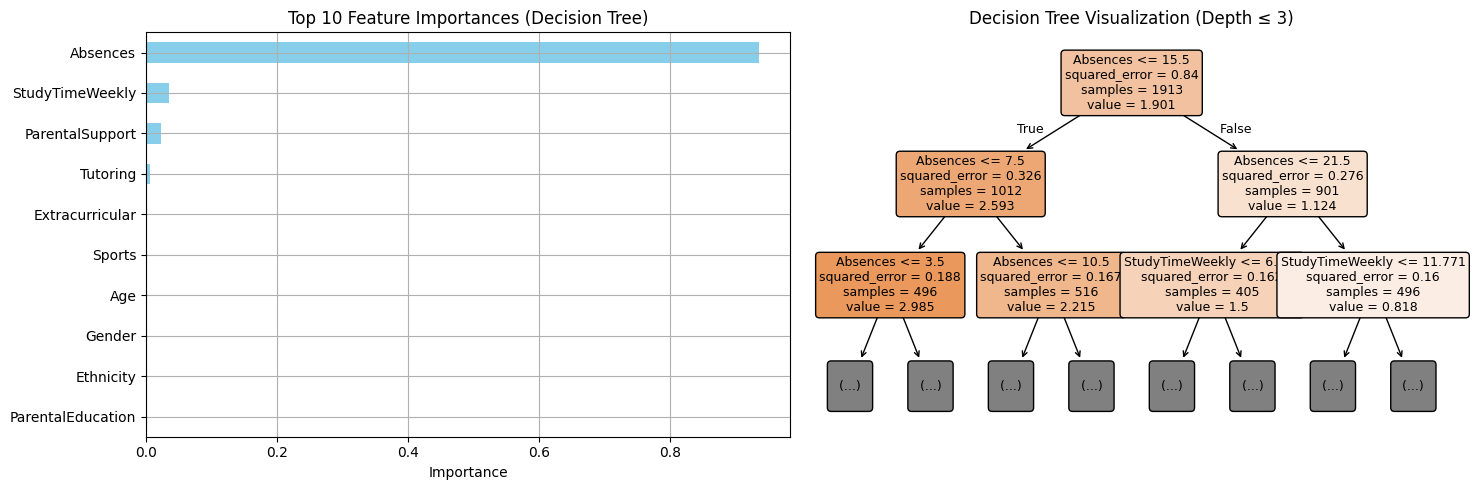

In [56]:
from sklearn.tree import plot_tree

# ---- Create subplots ----
fig, axs = plt.subplots(1, 2, figsize=(15, 5))  # 1 row, 2 columns

# ---- Plot 1: Feature importances (barh) ----
feat_importances = pd.Series(tree.feature_importances_, index=X.columns)
top_feats = feat_importances.nlargest(10).sort_values()

top_feats.plot(kind='barh', ax=axs[0], color='skyblue')
axs[0].set_title("Top 10 Feature Importances (Decision Tree)")
axs[0].set_xlabel("Importance")
axs[0].grid(True)

# ---- Plot 2: Decision Tree ----
plot_tree(tree,
          feature_names=X.columns,
          filled=True,
          rounded=True,
          fontsize=9,
          max_depth=2,  # optional: limit depth
          ax=axs[1])

axs[1].set_title("Decision Tree Visualization (Depth ≤ 3)")

plt.tight_layout()
plt.show()



We can see the the tree relays a lot in the variable "absences" this is the biggest predictor. An observation on causality is that this analysis does not allow to point the direction of the causality. Even though we can use absences in order to predict the GPA, it is likely that students that perform poorly do not feel well in school and are more likely to miss classes.

### Comparing the two models
In order to compare them I will use two criteria.
*   The Mean Absolute Error, gets the average absolute distance between the preditcion and the oberved data. We gets this by comparing the test set.
*   The other measure that we have is the Root Squared Mean Error. This is a weighted average that punishes big mistakes more.

We can see that both are smaller in the linear regression comparing with the decision tree.